# Multiplication

In this notebook, we will program a few different multiplication algorithms and test their efficiency. Of course, we could use the built-in Python multiplication to multiply numbers but for this lesson, we will be programming all of the arithmetic. So, firstly we will be inputting our data using strings of bits. And for two binary strings, we will need to add them. The first function here is binary addition on strings.

## Addition

In [2]:
def binary_string_addition(v,u):
    """given two binary strings v and u, return their sum as a binary string"""
    if len(v) > len(u):             #if v is longer than u, then we will pad u with 0's on the left to make the strings the same size.
        j = u
        while len(v) > len(j):
            j = "0" + j
        return binary_string_addition(v,j)
    if len(v) < len(u):             #if u is longer than v, then just run the inputs in the opposite order.
        return binary_string_addition(u,v)
    output = ""
    carry = 0                       #this function works like gradeschool arithmetic with a carry.
    for i in range(1,len(v)+1):     #now that we are guaranteed both strings are the same length, loop through each entry starting from the right-most
        s = carry + int(u[-i]) + int(v[-i])   #u[-i] is python's way of saying to take the ith entry from the right.
                                    #this operation uses python's internal arithmetic but it will only be adding 1's and 0's.
        if s < 2:                   #if the sum is less than 2, then you don't need a carry (because we are working in binary)
            output = str(s) + output   
            carry = 0
        else:                       #if the sum is greater than or equal to 2, then we will set carry to be 1
            s = s-2
            output = str(s) + output
            carry = 1
    if carry == 1:                  #then if carry is 1 after adding the left-most column, then we need 1 more column to the left
        output = "1" + output
    return output

We want to test it out on some inputs so let's use Python's arithmetic to test it out. To sum two binary numbers in python, you have to use `int` and add the two numbers then use `bin` to convert them back to binary. For example, to add 100110 and 11101, you would write:

In [4]:
bin(int("100110",2)+int("11101",2))

'0b1000011'

The '0b' at the beginning of the string is there to indicate that the string is in binary. The actual answer is 1000011. We can use Python to understand that we just added 38 + 29 = 67

In [5]:
print(int("100110",2))
print(int("11101",2))
print(int("1000011",2))

38
29
67


Let's try the same addition with our code:

In [6]:
binary_string_addition("100110","11101")

'1000011'

Great!!! You can try it out on some more examples. I hard-coded the addition because I don't exactly know how python adds binary numbers (probably more efficiently than my code) but I don't want that to get in the way of the runtime analysis. Since we have our own code, we can analyze its runtime without having to guess at how the programming language does it.

### Adding more than two binary strings:

For some of these algorithms, it will be nice to have a function that can add more than two binary strings: You must implement an algorithm for this in order to complete the rest of the notebook. (May I suggest divide and conquer?)

In [3]:
def binary_string_addition_list(list_of_strings):
    """Takes a list of binary strings and sums them all"""
    lenls = len(list_of_strings)
    if lenls == 1:
        return list_of_strings[0]
    else:
        m = int(lenls/2)
        b1 = binary_string_addition_list(list_of_strings[:m])
        b2 = binary_string_addition_list(list_of_strings[m:])
        return binary_string_addition(b1,b2)

For example, your algorithm on the following input:

`binary_string_addition_list(["100110","11101","10000","1010111","110","11"])`

should result in:
`'10110011'`

In [8]:
binary_string_addition_list(["100110","11101","10000","1010111","110","11"])

'10110011'

## Subtraction

We will also be using subtraction. Subtraction is a bit trickier than addition. We really only want to be using positive integers, so what do you do when you subtract a smaller positive integer by a larger positive integer? We will just assume this never happens!

In [4]:
def binary_string_subtraction(v,u):
    """Input two binary strings with the first string greater than the second string and return the difference."""
    if len(v) > len(u):
        j = u
        while len(v) > len(j):
            j = "0" + j
        return binary_string_subtraction(v,j)
    output = ""
    carry = 0
    for i in range(1,len(v)+1):
        if carry == 0:
            if int(v[-i]) >= int(u[-i]):
                s = int(v[-i]) - int(u[-i])
                output = str(s) + output
                carry = 0
            else:
                output = "1" + output
                carry = 1
        else:
            if (int(v[-i]) == 1) & (int(u[-i]) == 0):
                output = "0" + output
                carry = 0
            if (int(v[-i]) == 1) & (int(u[-i]) == 1):
                output = "1" + output
                carry = 1
            if (int(v[-i]) == 0) & (int(u[-i]) == 0):
                output = "1" + output
                carry = 1
            if (int(v[-i]) == 0) & (int(u[-i]) == 1):
                output = "0" + output
                carry = 1
    return output

Let's test it out:

In [10]:
binary_string_subtraction("100110","11101")

'001001'

In [11]:
bin(int("100110",2)-int("11101",2))

'0b1001'

Notice that it doesn't work well if you input a smaller number minus a larger number:

In [12]:
binary_string_subtraction("11101","100110")

'10111'

In [13]:
bin(int("11101",2)-int("100110",2))

'-0b1001'

(Can you figure out what is happening when you try to subtract a smaller number minus a bigger number?)

## Multiplication:

We will first consider the gradeschool method (learned in elementary school). Here is an implementation:

In [5]:
def gradeschool(x,y):
    """Takes two binary strings x,y and returns their product"""
    lenx = len(x)
    leny = len(y)
    if lenx > leny:                      #if x has more bits than y, then pad the left of y with 0's until they are the same length     
        j = y
        while lenx > len(j):
            j = "0" + j
        return gradeschool(x,j)
    if leny > lenx:                      #if y has more bits than x, then swap their order.
        return gradeschool(y,x)
    step = [""]*lenx                     #this initializes the list of summands that result from the single bit multiplications.
    for xi in range(1,lenx+1):
            if x[-xi] == "1":              #for each bit in x, if the bit is a 1, then copy y into the step array with the corresponding number of zeros padding the right.
                step[-xi] = y + "0"*(xi-1)
            else:
                step[-xi] = "0"          #if the bit is 0, then copy down "0" in the corresponding entry in step
    return binary_string_addition_list(step)

Let's test it out!!!!

In [15]:
gradeschool("11101","100110")

'10001001110'

In [16]:
bin(int("100110",2)*int("11101",2))

'0b10001001110'

## Runtime Analysis of gradeschool:

Let's plot gradeschool on a log-linear plot. The slope of the plot will correspond to the degree of the polynomial associated with the runtime. In order to test it out on many different inputs, we will choose random inputs each time. `random_binary_string(n)` will return a random binary string of length n.

In [6]:
import matplotlib.pyplot as plt
import random
import time
import numpy as np

In [7]:
def random_binary_string(N):
    output = ""
    for i in range(N):
        r = random.randint(0,1)
        output = output + str(r)
    return output

In [19]:
random_binary_string(10)

'1000101100'

We are going to run gradeschool on inputs of sizes $2^{7},2^{8},\dots,2^{14}$ and plot the *logs of the* times against the values $7,\dots,14$ (this code may take a few minutes to run.)

In [21]:
x_valuesGS = []
y_valuesGS = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(7,14): #if you want to iterate from 7 to 13 (inclusive)......
    x_valuesGS = x_valuesGS + [i] # this appends i to the end of the x_values array
    r1 = random_binary_string(2**i)
    r2 = random_binary_string(2**i)
    t0 = time.process_time()
    x = gradeschool(r1,r2)          
    t1 = (time.process_time() - t0)
    y_valuesGS = y_valuesGS + [np.log2(t1)] #this appends the log of the amount of time to the end of the y_values array

[7, 8, 9, 10, 11, 12, 13] [-6.0, -4.415037499278844, -2.192645077942396, -0.14201900487242788, 1.9541963103868751, 4.008428622070581, 6.149747119504682]


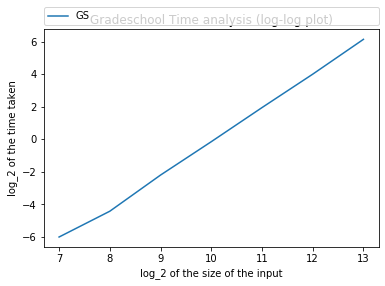

In [22]:
plt.plot(x_valuesGS,y_valuesGS, label = "GS")
plt.xlabel('log_2 of the size of the input')
plt.ylabel("log_2 of the time taken")
plt.title("Gradeschool Time analysis (log-log plot)")
print(x_valuesGS,y_valuesGS)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

Your plot should be a straight line. (if its a little crooked at the beginning then try again with higher values (your computer is fast!). This plot is called a log-log plot and if you plot the runtime of a polynomial time algorithm on a log-log plot then the the result will be a straight line and the slope of the line will correspond to the degree of the polynomial. In class we saw that gradeschool multiplication should run in $O(n^2)$ time and as you can see from the plot, the slope of the line is roughly 2. Let's do the same analysis on Multiply Karatsuba.

In [8]:
def MultiplyKS(x,y):
    lenx = len(x)                  #just like the other arithmetic algorithm, we make sure that the two inputs are of the same length
    leny = len(y)
    if lenx > leny:
        j = y
        while lenx > len(j):
            j = "0" + j
        return MultiplyKS(x,j)
    if leny > lenx:
        return MultiplyKS(y,x)
    if lenx == 1:               #here is the base case, if x=0 then return 0. if x=1 then return y.
        if x[0] == "0":
            return "0"
        if x[0] == "1":
            return y
    if lenx%2 == 1:             #if the length is odd, then we pad it to the left with a 0 to make it even so that it divides in half evenly
        x_new = "0" + x
        y_new = "0" + y
        return MultiplyKS(x_new,y_new)
    mid = int((lenx+1)/2)          #this will take the floor of the length of the inputs.
    xL = x[:mid]                #these 4 lines assign the left and right parts of x and y
    xR = x[mid:]
    yL = y[:mid]
    yR = y[mid:]
    sum_x = binary_string_addition(xL,xR)       #recall that for Karatsuba, we need to add xL and xR before we multilply
    sum_y = binary_string_addition(yL,yR)       #recall that for Karatsuba, we need to add yL and yR before we multilply
    R1 = MultiplyKS(xL,yL)                      #here are the recursive calls...
    R2 = MultiplyKS(xR,yR)
    R3 = MultiplyKS(sum_x,sum_y)
    T1 = R1 + "0"*lenx                          #this line is equivalent to muliplying R1 times 2^(lenx)
    T2 = R2
    T3 = binary_string_subtraction(R3,R1)       #these next 3 lines subtract the results from R1,R2,R3 to get the middle term then "multiply" it by 2^(mid)
    T3 = binary_string_subtraction(T3,R2)
    T3 = T3 + "0"*mid
    result = binary_string_addition_list([T1,T2,T3])    
    if len(result)>0:
        if int(result) == 0:
            return "0"
        while result[0] == "0":
            result = result[1:]
    return result

Let's test it out!!

In [24]:
MultiplyKS("11101","100110")

'10001001110'

In [25]:
bin(int("100110",2)*int("11101",2))

'0b10001001110'

Now, let's do the same analysis as we did with gradeschool and plot the runtime of MultiplyKS on a log log plot to estimate the degree of the polynomial using the slope. We will plot both MultiplyKS and gradeschool on the same plot so that we can compare them.

In [26]:
x_valuesKS = []
y_valuesKS = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(7,14): #if you want to iterate from 7 to 13 (inclusive)
    x_valuesKS = x_valuesKS + [i] # this appends i to the end of the x_values array
    r1 = random_binary_string(2**i)
    r2 = random_binary_string(2**i)
    t0 = time.process_time()
    x = MultiplyKS(r1,r2)
    t1 = (time.process_time() - t0)
    y_valuesKS = y_valuesKS + [np.log2(t1)] #this appends the log of the amount of time to the end of the y_values array

GS values:  [7, 8, 9, 10, 11, 12, 13] [-6.0, -4.415037499278844, -2.192645077942396, -0.14201900487242788, 1.9541963103868751, 4.008428622070581, 6.149747119504682]
KS values:  [7, 8, 9, 10, 11, 12, 13] [-4.0, -2.192645077942396, -0.6780719051126377, 0.9886846867721658, 2.566054038171092, 4.16867211813223, 5.776021715252813]


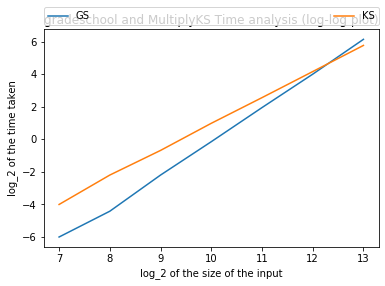

In [27]:
plt.plot(x_valuesGS,y_valuesGS,label = "GS")
plt.plot(x_valuesKS,y_valuesKS,label = "KS")
plt.xlabel('log_2 of the size of the input')
plt.ylabel("log_2 of the time taken")
plt.title("gradeschool and MultiplyKS Time analysis (log-log plot)")
print("GS values: ",x_valuesGS,y_valuesGS)
print("KS values: ",x_valuesKS,y_valuesKS)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

Notice that they intersect a little after 2^12 or around 5000. This means that the overhead required for karatsuba is not worth it until your input is bigger than around 5000.

## Thresholding

There is a technique called "thresholding" that we can use. We can combine the two algorithms by initially calling Karatsuba on large inputs and recurse until the recursive calls are smaller than a particular threshold value `T`, then compute using gradescope.

Here is an implementation of thresholding:


In [9]:
def Threshold_KS_GS(x,y,T):
    """This will multiply x and y using KS until the size is less than T, in which case it will use GS."""
    lenx = len(x)                  #just like the other arithmetic algorithm, we make sure that the two inputs are of the same length
    leny = len(y)
    if lenx > leny:
        j = y
        while lenx > len(j):
            j = "0" + j
        return Threshold_KS_GS(x,j,T)
    if leny > lenx:
        return Threshold_KS_GS(y,x,T)
    if lenx < T:                #if the lenght is less than T, then use gradeschool (this is just a very large base case.)
        return gradeschool(x,y)
    if lenx%2 == 1:             #if the length is odd, then we pad it to the left with a 0 to make it even so that it divides in half evenly
        x_new = "0" + x
        y_new = "0" + y
        return Threshold_KS_GS(x_new,y_new,T)
    mid = int((lenx)/2)          #this will divide the input size by 2.
    xL = x[:mid]                #these 4 lines assign the left and right parts of x and y
    xR = x[mid:]
    yL = y[:mid]
    yR = y[mid:]
    sum_x = binary_string_addition(xL,xR)       #recall that for Karatsuba, we need to add xL and xR before we multilply
    sum_y = binary_string_addition(yL,yR)       #recall that for Karatsuba, we need to add yL and yR before we multilply
    R1 = Threshold_KS_GS(xL,yL,T)                      #here are the recursive calls...
    R2 = Threshold_KS_GS(xR,yR,T)
    R3 = Threshold_KS_GS(sum_x,sum_y,T)
    T1 = R1 + "0"*lenx                          #this line is equivalent to muliplying R1 times 2^(lenx)
    T2 = R2
    T3 = binary_string_subtraction(R3,R1)       #these next 3 lines subtract the results from R1,R2,R3 to get the middle term then "multiply" it by 2^(mid)
    T3 = binary_string_subtraction(T3,R2)
    T3 = T3 + "0"*mid
    result = binary_string_addition_list([T1,T2,T3])    
    if len(result)>0:
        if int(result) == 0:
            return "0"
        while result[0] == "0":
            result = result[1:]
    return result

#### Let's set the Threshold to be 5000 and see if it improves the runtime:

In [29]:
x_valuesTH5000 = []
y_valuesTH5000 = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(7,14): #if you want to iterate from 7 to 13 (inclusive)
    x_valuesTH5000 = x_valuesTH5000 + [i] # this appends i to the end of the x_values array
    r1 = random_binary_string(2**i)
    r2 = random_binary_string(2**i)
    t0 = time.process_time()
    x = Threshold_KS_GS(r1,r2,5000)
    t1 = (time.process_time() - t0)
    y_valuesTH5000 = y_valuesTH5000 + [np.log2(t1)] #this appends the log of the amount of time to the end of the y_values array

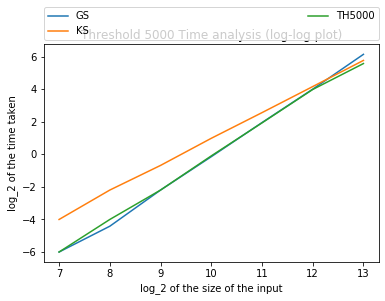

In [30]:
plt.plot(x_valuesGS,y_valuesGS,label = "GS")
plt.plot(x_valuesKS,y_valuesKS,label = "KS")
plt.plot(x_valuesTH5000,y_valuesTH5000,label = "TH5000")
plt.xlabel('log_2 of the size of the input')
plt.ylabel("log_2 of the time taken")
plt.title("Threshold 5000 Time analysis (log-log plot)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

It makes sense that the threshold plot is even with the gradescope plot until it breaks off at around 5000 to be parallel with the KS plot.

## $\color{red}{\text{Exercise 1}}$

Find the threshold T that gives you the best efficiency. (Your answer should be an integer and we are not looking for an exact answer but you should get close.)

(Answer: roughly 20 to 80)

## Cook-Toom-3

Karatsuba Multiplication is another name for Cook-Toom-2. Recall that the Cook-Toom-k algorithm splits the input into parts of size n/k and performs 2k-1 recursive calls. When k=2, we get Karatsuba. When k=3,  we get Cook-Toom-3.

Now, the naive way to multiply two trinomials: $(ax^2 + bx + c)(dx^2 + ex + f)$ requires 9 multiplications:
$$x^4(ad) + x^3(ae+bd) + x^2(af+be+cd) + x(bf+ce) + (cf)$$

But by using some matrix algebra, we can reduce the 9 multiplications down to 5.
The way to do this is to start with the equation:

$$(ax^2 + bx + c)(dx^2 + ex + f) = C_4x^4 + C_3x^3 + C_2x^2 + C_1x + C_0$$

And plug in simple values for x to get 5 simple equations. With this system of equations we can construct a matrix that represents the products on the left side in terms of the $C_i$ values and if we invert the matrix, then we get the $C_i$ values in terms of the products.

### getting 5 equations.
The easiest value to plug in for x is $x=0$. This results in the equation:
$$cf = C_0$$

It may seem illegal, but the next easiest value to plug in is $x=\infty$. This results in the equation:
$$ad = C_4$$

After that, we will plug in $x=1$ which results in:
$$(a+b+c)(d+e+f) = C_4+C_3+C_2+C_1+C_0$$

Then $x=2$ results in:
$$(4a+2b+c)(4d+2e+f) = 16C_4+8C_3 +4C_2 + 2C_1+C_0$$

The last value we will use is $x=3$. This results in:
$$(9a+3b+c)(9d+3e+f) =81C_4+27C_3 +9C_2 + 3C_1+C_0$$

Now we have 5 equations with a product on the left side and a linear combination of $C_i$'s on the right. Let's name the products:

* $P_1=cf$
* $P_2=ad$
* $P_3=(a+b+c)(d+e+f)$
* $P_4=(4a+2b+c)(4d+2e+f)$
* $P_5=(9a+3b+c)(9d+3e+f)$

Then we have the matrix equation:

$$
\left(\begin{array}
~P_1     \\
P_2     \\
P_3  \\
P_4     \\
P_5
\end{array}\right) = 
\left(\begin{array}
   ~ 1     &   0       & 0     &   0  &0       \\
0       &   0       & 0     &   0 & 1       \\
1       &   1       & 1     &   1 & 1       \\
1       &   2       &4     &   8 & 16       \\
1       &   3       & 9     &   27 & 81       \\
\end{array}\right)  
\left(\begin{array}
~C_0     \\
C_1    \\
C_2  \\
C_3     \\
C_4
\end{array}\right)
$$


Now, we can take the inverse to get the $C$'s in terms of the $P$'s.

In [39]:
import sympy

In [40]:
M = sympy.Matrix([[1, 0,0,0,0],
              [0,0,0,0,1],
             [1,1,1,1,1],
             [1,2,4,8,16],
             [1,3,9,27,81]])

In [41]:
M

Matrix([
[1, 0, 0,  0,  0],
[0, 0, 0,  0,  1],
[1, 1, 1,  1,  1],
[1, 2, 4,  8, 16],
[1, 3, 9, 27, 81]])

In [42]:
m = M.inv()

In [43]:
m

Matrix([
[    1,  0,    0,    0,    0],
[-11/6, -6,    3, -3/2,  1/3],
[    1, 11, -5/2,    2, -1/2],
[ -1/6, -6,  1/2, -1/2,  1/6],
[    0,  1,    0,    0,    0]])

This means that:
$$
\left(\begin{array}
~C_0     \\
C_1     \\
C_2  \\
C_3     \\
C_4
\end{array}\right) = 
\left(\begin{array}
   ~ 1     &   0       & 0     &   0  &0       \\
-11/6       &  -6       & 3     &   -3/2 & 1/3       \\
1       &   11       & -5/2     &   2 & -1/2       \\
-1/6       &   -6      &1/2     &   -1/2 & 1/6       \\
0       &  1       & 0    &   0 &0      \\
\end{array}\right)  
\left(\begin{array}
~P_1     \\
P_2     \\
P_3  \\
P_4     \\
P_5
\end{array}\right)
$$

Or in other words:
* $C_0 = P_1$
* $C_1 = (-11/6)P_1-6P_2+3P_3-(3/2)P_4 + (1/3)P_5$
* $C_2 = P_1 + 11P_2 -(5/2)P_3 +2P_4 - (1/2)P_5$
* $C_3 = -(1/6)P_1 -6P_2 + (1/2)P_3 -(1/2)P_4 + (1/6)P_5$
* $C_4 = P_2$

This looks a bit messy. And it is. But let's try to get around doing a lot of dividing. We will multiply each equation above by the minimum value to make it an integer coefficient equation:

* $C_0 = P_1$
* $6C_1 = -11P_1-36P_2+18P_3-9P_4 + 2P_5$
* $2C_2 = 2P_1 +22P_2 -5P_3 +4P_4-P_5$
* $6C_3 = -P_1 -36P_2+3P_3 -3P_4 + P_5$
* $C_4 = P_2$

So, now the only numbers we need to divide by are by 2 and by 6 but we can get away with dividing by 2 and then by 3 to get 6. One worry would be fractional parts, but by the way we set it up, whenever we divide by 2 or 6, we will be guaranteed to perform the division on a multiple of 2 or 6 so that they will divide evenly and result in an integer.

Also, we will need a quick way to multiply by 2, 3, 5 and 11. Multiplying by 2 is easy, just add some 0's to the right. Multiplying by 3,5 and 11 will need a little more work.

In [10]:
def binary_string_divide_2(x):
    """Input is an even binary string, result is that integer divided by 2"""
    return x[:-1]                 #dividing an even binary string by 2 is the same as just deleting the rightmost "0"

In [11]:
binary_string_divide_2("110001010")

'11000101'

In [12]:
def binary_string_divide_3(x):
    """Input is a binary string that is a multiple of 3, result is that integer divided by 3"""
    if x == "":                                      #don't worry so much about how this implementation works, but it is based on long division.
        return ""
    if x[0] == "0":
        return "0" + binary_string_divide_3(x[1:])
    if x[0:2] == "11":
        return "01" + binary_string_divide_3(x[2:])
    if x[0:3] == "100":
        return "001" + binary_string_divide_3("1" + x[3:])[1:]
    if x[0:3] == "101":
        return "001" + binary_string_divide_3("10" + x[3:])[2:]

In [13]:
def binary_string_divide_6(x):
    """Input is a binary string that is a multiple of 6, result is that integer divided by 6"""
    result = binary_string_divide_2(x)
    result = binary_string_divide_3(result)
    return result

In [14]:
def binary_string_multiply_2(x):
    """Input is a binary string, result is that integer multiplied by 2"""
    return x + "0"                 #multiplying by 2 is the same as just adding a "0" to the right

In [15]:
def binary_string_multiply_3(x):
    """Input is a binary string, result is that integer multiplied by 3"""
    return binary_string_addition(x + "0",x) #since 3 is 11 in binary, just add x to 10*x

In [16]:
def binary_string_multiply_4(x):
    """Input is a binary string, result is that integer multiplied by 2"""
    return x + "00"                 #multiplying by 4 is the same as just adding a "00" to the right

In [17]:
def binary_string_multiply_5(x):
    """Input is a binary string, result is that integer multiplied by 5"""
    return binary_string_addition(x + "00",x) #since 5 is 101 in binary, just add x to 100*x

In [18]:
def binary_string_multiply_6(x):
    """Input is a binary string, result is that integer multiplied by 6"""
    return binary_string_multiply_3(x + "0") #this is essentially multiplying by 2 then by 3

In [19]:
def binary_string_multiply_9(x):
    """Input is a binary string, result is that integer multiplied by 9"""
    return binary_string_multiply_3(binary_string_multiply_3(x)) #this is essentially multiplying by 3 then 3

In [20]:
def binary_string_multiply_11(x):
    """Input is a binary string, result is that integer multiplied by 11"""
    return binary_string_addition_list([x + "000",x +"0",x]) #since 11 is 1011 in binary, just add x to 10*x to 1000*x

In [21]:
def binary_string_multiply_12(x):
    """Input is a binary string, result is that integer multiplied by 12"""
    return binary_string_multiply_3(x + "00") #this is essentially multiplying by 4 then by 3

In [22]:
def binary_string_multiply_18(x):
    """Input is a binary string, result is that integer multiplied by 12"""
    return binary_string_multiply_9(x + "0") #this is essentially multiplying by 2 then by 9

In [23]:
def binary_string_multiply_22(x):
    """Input is a binary string, result is that integer multiplied by 12"""
    return binary_string_multiply_11(x + "0") #this is essentially multiplying by 2 then by 11

In [24]:
def binary_string_multiply_36(x):
    """Input is a binary string, result is that integer multiplied by 12"""
    return binary_string_multiply_9(x + "00") #this is essentially multiplying by 4 then by 9

In [29]:
def CookToom3(x,y):
    lenx = len(x)                  #just like the other arithmetic algorithm, we make sure that the two inputs are of the same length
    leny = len(y)
    if lenx > leny:
        j = y
        while lenx > len(j):
            j = "0" + j
        return CookToom3(x,j)
    if leny > lenx:
        return CookToom3(y,x)
    if lenx < 4:               #here is the base case, if x and y are both small then gradeshool them
        return gradeschool(x,y) # the reason that we need the base case less than or equal to 4 is because the sum5 and sum6 will increase to a 4bit number even for single bit parts.
    if lenx%3 == 1:             #if the length is not a multiple of 3, then we pad it to the left with 0's to make it a multiple of three so that it divides in thirds evenly
        x_new = "00" + x
        y_new = "00" + y
        return CookToom3(x_new,y_new)
    if lenx%3 == 2:             #if the length is not a multiple of 3, then we pad it to the left with a 0 to make it a multiple of three so that it divides in thirds evenly
        x_new = "0" + x
        y_new = "0" + y
        return CookToom3(x_new,y_new)
    thd = int((lenx)/3)          #this will divide the input size by 3
    xL = x[:thd]                #these 6 lines assign the left, middle, and right parts of x and y
    xM = x[thd:2*thd]
    xR = x[2*thd:]
    yL = y[:thd]    
    yM = y[thd:2*thd]
    yR = y[2*thd:]
    sum_1 = binary_string_addition_list([xL,xM,xR])    #sum 1 is a+b+c
    sum_2 = binary_string_addition_list([yL,yM,yR])    #sum 2 is d+e+f
    sum_3 = binary_string_addition_list([xL+"00",xM+"0",xR])    #sum 3 is 4a+2b+c
    sum_4 = binary_string_addition_list([yL + "00",yM + "0",yR])    #sum 4 is 4d+2e+f
    sum_5 = binary_string_addition_list([binary_string_multiply_9(xL),binary_string_multiply_3(xM),xR])    #sum 5 is 9a +3b+c
    sum_6 = binary_string_addition_list([binary_string_multiply_9(yL),binary_string_multiply_3(yM),yR])    #sum 6 is 9d +3e+f
    
    P1 = CookToom3(xR,yR)                      #here are the recursive calls...
    P2 = CookToom3(xL,yL)
    P3 = CookToom3(sum_1,sum_2)
    P4 = CookToom3(sum_3,sum_4)
    P5 = CookToom3(sum_5,sum_6)
    P1t2 = binary_string_multiply_2(P1)                         #this is P1 times 2
    P1t11 = binary_string_multiply_11(P1)                         #this is P1 times 11
    P2t36 = binary_string_multiply_36(P2)                         #this is P2 times 36
    P2t22 = binary_string_multiply_22(P2)                         #this is P2 times 22
    P3t18 = binary_string_multiply_18(P3)                         #this is P3 times 18
    P3t5 = binary_string_multiply_5(P3)                         #this is P3 times 5
    P3t3 = binary_string_multiply_3(P3)                         #this is P3 times 3
    P4t9 = binary_string_multiply_9(P4)                         #this is P4 times 9
    P4t4 = binary_string_multiply_4(P4)                         #this is P4 times 4
    P4t3 = binary_string_multiply_3(P4)                         #this is P4 times 3
    P5t2 = binary_string_multiply_2(P5)                         #this is P5 times 2
    C0 = P1
    pos = binary_string_addition_list([P3t18,P5t2])               
    neg = binary_string_addition_list([P1t11,P2t36,P4t9])
    C1t6 = binary_string_subtraction(pos,neg)                     #this sets 6C1 = -11P1-36P2+18P3-9P4+2P5
    pos = binary_string_addition_list([P1t2,P2t22,P4t4])               
    neg = binary_string_addition_list([P3t5,P5])
    C2t2 = binary_string_subtraction(pos,neg)                     #this sets 2C2 = 2P1+22P2-5P3+4P4-P5
    pos = binary_string_addition_list([P3t3,P5])               
    neg = binary_string_addition_list([P1,P2t36,P4t3])
    C3t6 = binary_string_subtraction(pos,neg)                     #this sets 6C3 = -P1-36P2+3P3-3P4+P5
    C4 = P2
    C1 = binary_string_divide_6(C1t6)
    C2 = binary_string_divide_2(C2t2)
    C3 = binary_string_divide_6(C3t6)
    T0 = C0
    T1 = C1 + "0"*thd
    T2 = C2 + "0"*(2*thd)
    T3 = C3 + "0"*(3*thd)
    T4 = C4 + "0"*(4*thd)
    result = binary_string_addition_list([T0,T1,T2,T3,T4])     #add them all together and you are done!
    if len(result)>0:
        if int(result) == 0:
            return "0"
        while result[0] == "0":
            result = result[1:]
    return result

In [33]:
CookToom3("111010011","100110001100")

'100010110101001100100'

In [34]:
bin(int("111010011",2)*int("100110001100",2))

'0b100010110101001100100'

In [35]:
import sys
sys.setrecursionlimit(10000)

In [65]:
x_valuesCT = []
y_valuesCT = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(7,14): #if you want to iterate from XXXXXXX......
    x_valuesCT = x_valuesCT + [i] # this appends i to the end of the x_values array
    r1 = random_binary_string(2**i)
    r2 = random_binary_string(2**i)
    t0 = time.process_time()
    x = CookToom3(r1,r2)
    t1 = (time.process_time() - t0)
    y_valuesCT = y_valuesCT + [np.log2(t1)] #this appends the log of the amount of time to the end of the y_values array

In [66]:
print(x_valuesCT,y_valuesCT)

[7, 8, 9, 10, 11, 12, 13] [-2.5405683813627027, -1.2995602818589078, 0.2667865406949014, 1.7347096202258383, 3.14210705730255, 4.675074920385445, 6.107217075591382]


In [36]:
plt.plot(x_valuesGS,y_valuesGS,label = "GS")
plt.plot(x_valuesKS,y_valuesKS,label = "KS")
plt.plot(x_valuesTH5000,y_valuesTH5000,label = "TH5000")
plt.plot(x_valuesCT,y_valuesCT,label = "CT")
plt.xlabel('log_2 of the size of the input')
plt.ylabel("log_2 of the time taken")
plt.title("Cook-Toom-3 Time analysis (log-log plot)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

NameError: name 'x_valuesGS' is not defined

In [68]:
x_valuesTH5 = []
y_valuesTH5 = []  #this initializes two arrays that we will use to store the points that we want to plot.
for i in range(7,14): #if you want to iterate from 7 to 13 (inclusive)
    x_valuesTH5 = x_valuesTH5 + [i] # this appends i to the end of the x_values array
    r1 = random_binary_string(2**i)
    r2 = random_binary_string(2**i)
    t0 = time.process_time()
    x = Threshold_KS_GS(r1,r2,5)
    t1 = (time.process_time() - t0)
    y_valuesTH5 = y_valuesTH5 + [np.log2(t1)] #this appends the log of the amount of time to the end of the y_values array

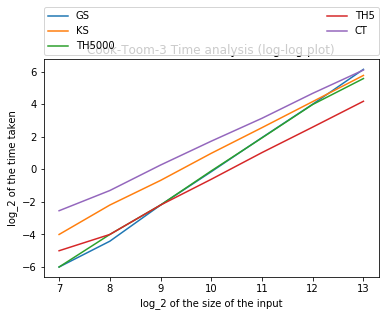

In [69]:
plt.plot(x_valuesGS,y_valuesGS,label = "GS")
plt.plot(x_valuesKS,y_valuesKS,label = "KS")
plt.plot(x_valuesTH5000,y_valuesTH5000,label = "TH5000")
plt.plot(x_valuesTH5,y_valuesTH5,label = "TH5")
plt.plot(x_valuesCT,y_valuesCT,label = "CT")
plt.xlabel('log_2 of the size of the input')
plt.ylabel("log_2 of the time taken")
plt.title("Cook-Toom-3 Time analysis (log-log plot)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()